Вибрати з інтернету набори зображень з різною контрастністю і різним флуктуаціями
освітленості. Для кожного зображення побудувати варіант спотвореного (видозміненого
зображення). Для кожної отриманої пари побудувати дескриптор і проаналізувати
можливість суміщення цих зображень і з визначення параметрів геметричних перетворень
(кут повороту, зміщень в напрямку х і напрямку y).

1. SIFT

Для перевірки збігів необхідно написати власну функцію матчінгу, а результати її роботи
перевірити засобами OpenCV. Якщо повної реалізації дескриптора не має в OpenCV, то
такий необхідно створити власну функцію побудови цих дискрипторів. У цьому випадку
матчінг можна здійснювати стандартними засобами (якщо це можливо).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cityblock

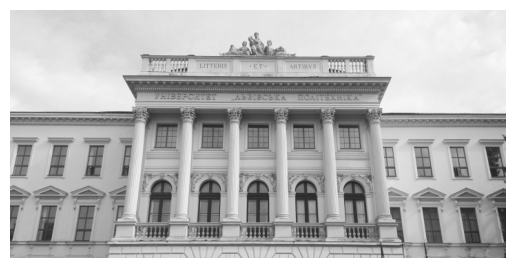

In [2]:
image = cv2.imread('/content/drive/MyDrive/NULP/Year-4/CV/img_1.jpg', 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

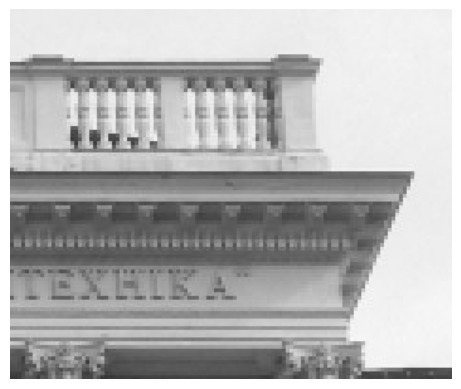

In [3]:
image_2 = cv2.imread('/content/drive/MyDrive/NULP/Year-4/CV/img_1_2.jpg', 0)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [4]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(image, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image_2,None)

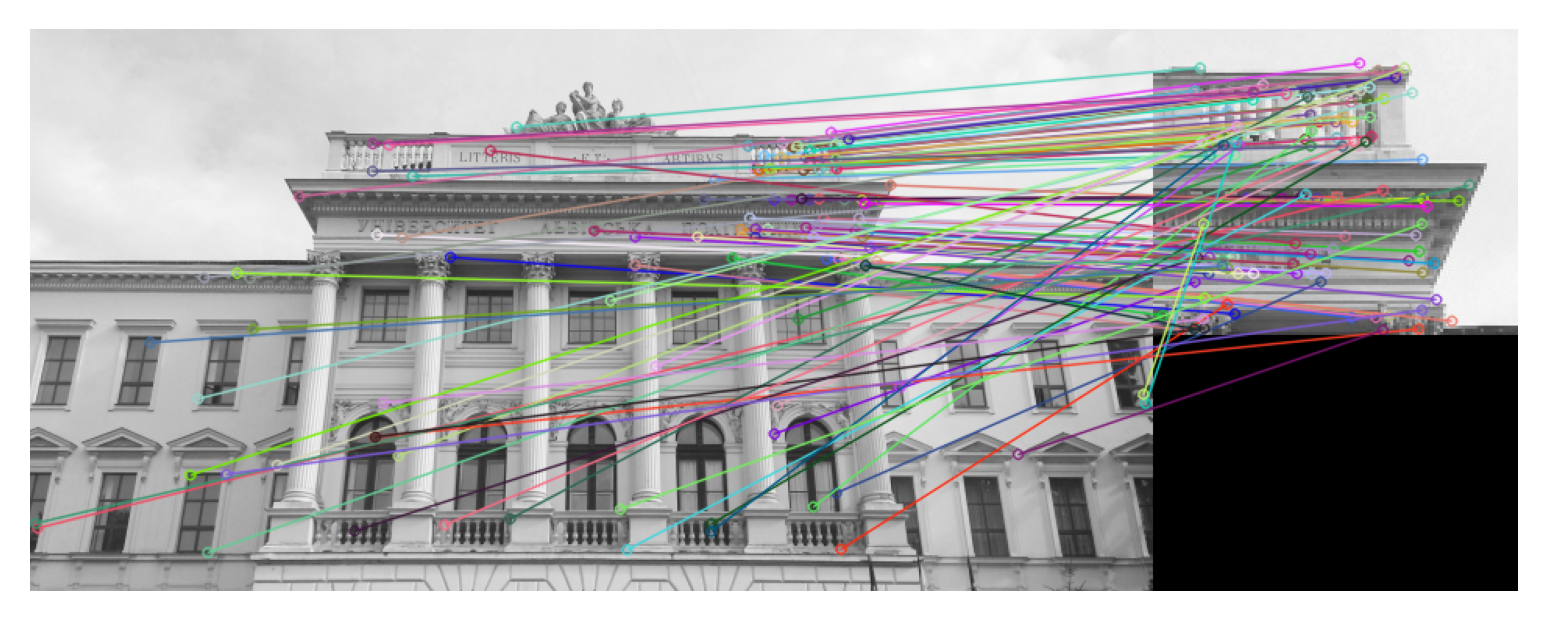

In [ ]:
import cv2
import matplotlib.pyplot as plt

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

match_im = cv2.drawMatches(image, keypoints_1, image_2, keypoints_2, matches[:150], image_2, flags=2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
def own_matcher(img1, img2):
    sift = cv2.xfeatures2d.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    matches = []
    for i, d1 in enumerate(des1):
        for j, d2 in enumerate(des2):
            matches.append(cv2.DMatch(_distance=float(cityblock(d1, d2)), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    matches = sorted(matches, key=lambda x: x.distance)

    result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:150], None, matchesThickness=1, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return result

def bf(img1, img2):
    sift = cv2.xfeatures2d.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(des1, des2)

    matches = sorted(matches, key=lambda x: x.distance)

    result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:150], None, matchesThickness=1, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return result

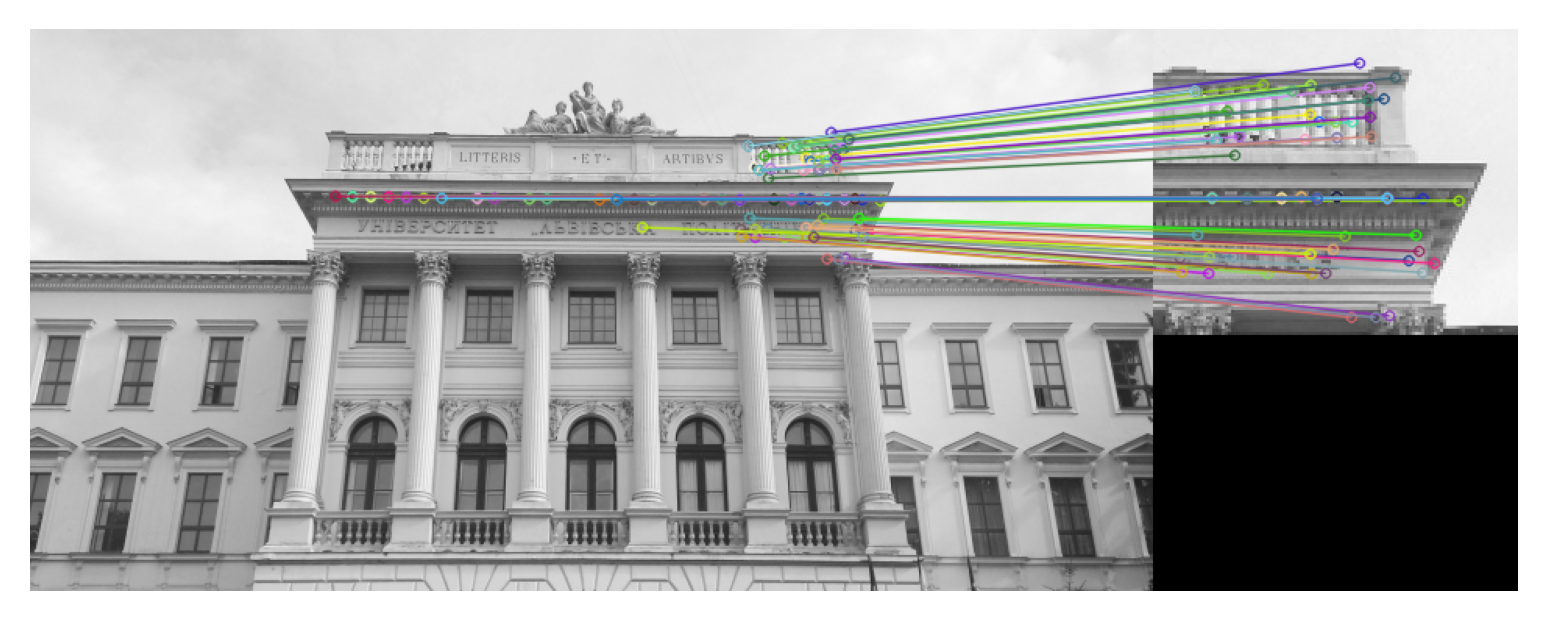

In [ ]:
match_im = own_matcher(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

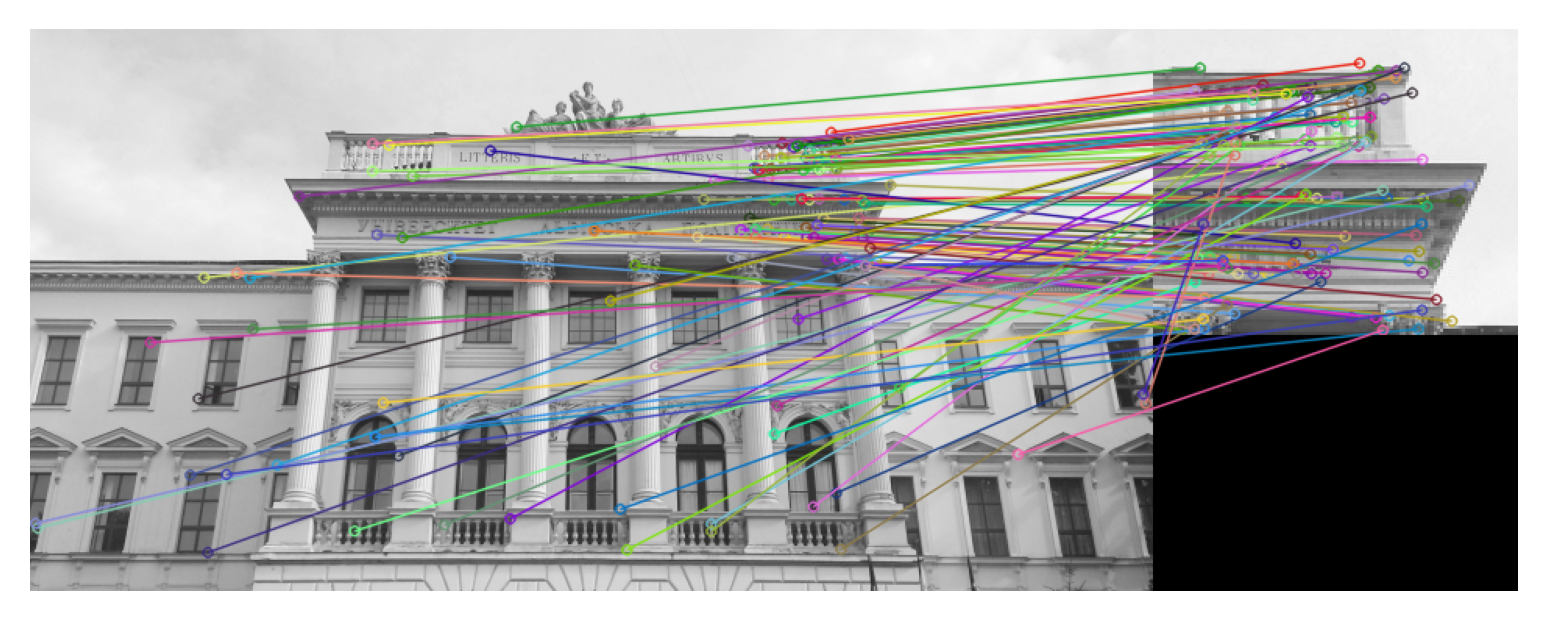

In [ ]:
match_im = bf(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

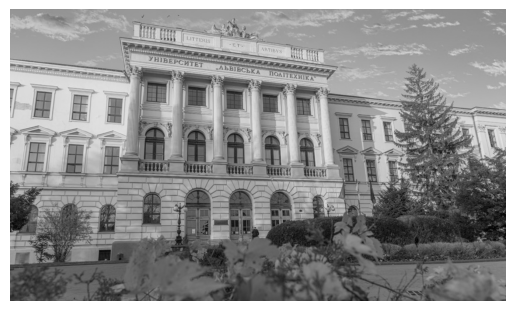

In [ ]:
image = cv2.imread('/content/drive/MyDrive/NULP/Year-4/CV/img_2.jpg', 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

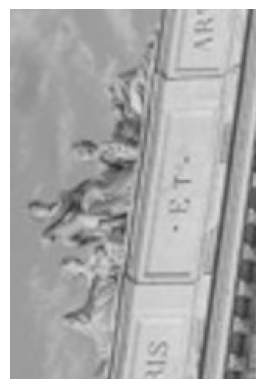

In [ ]:
image_2 = cv2.imread('/content/drive/MyDrive/NULP/Year-4/CV/img_2_1.jpg', 0)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

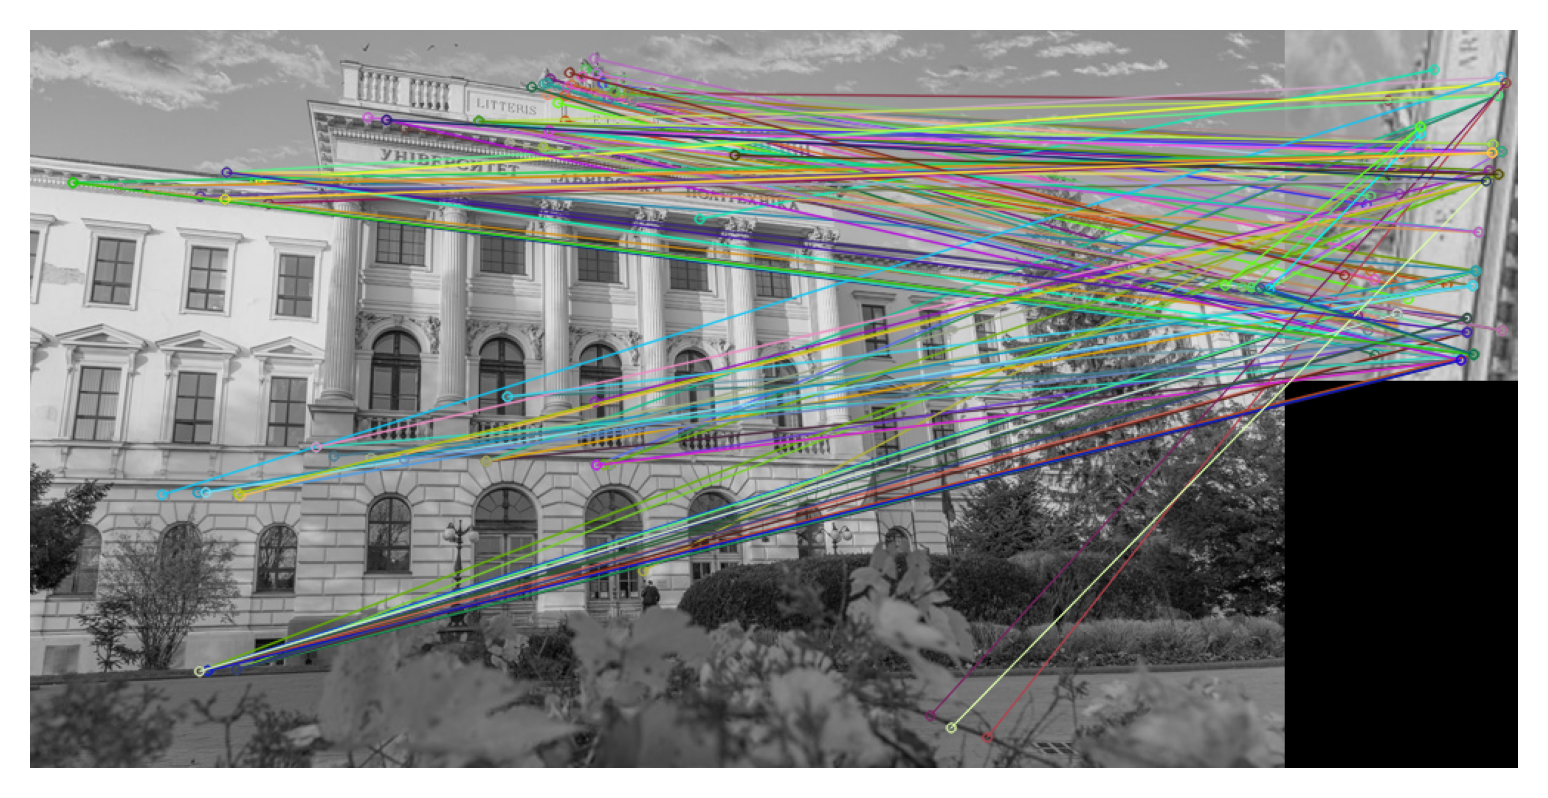

In [ ]:
match_im = own_matcher(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

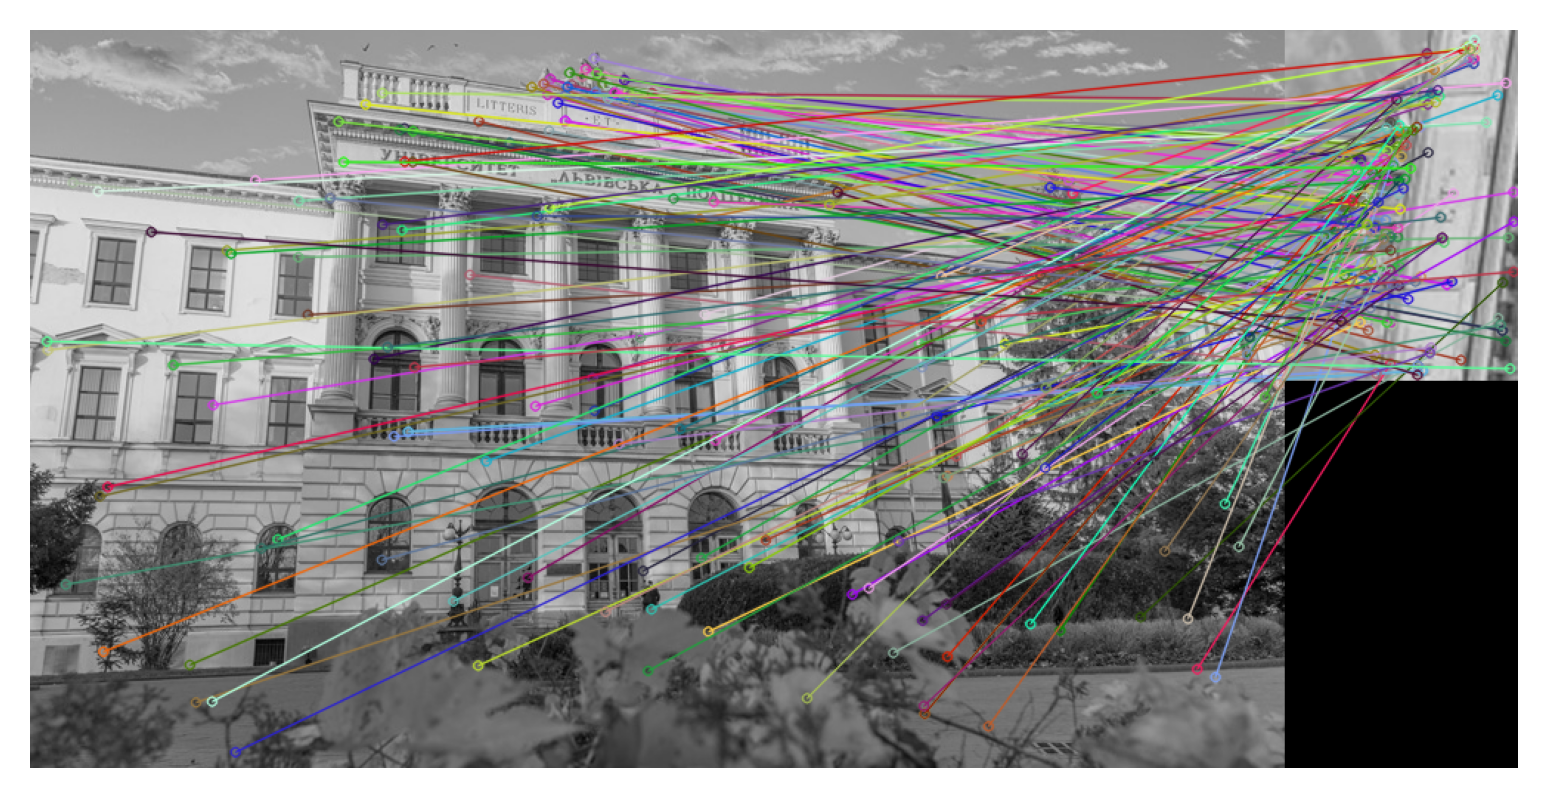

In [ ]:
match_im = bf(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()